In [31]:
import zipfile
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
data_path = Path('data')
zip_path = data_path / 'titanic.zip'

with zipfile.ZipFile(zip_path, 'r') as z:
    name = z.namelist()
    with z.open(name[1]) as f:
        df_test = pd.read_csv(f)
    with z.open(name[2]) as f:
        df_train = pd.read_csv(f)

In [33]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [35]:
variable_names = [name for name in df_train.columns]

In [36]:
def uni_plot(variable_names, df):
    if pd.api.types.is_numeric_dtype(df[variable_names]):
        plt.hist(df[variable_names])
        plt.xlabel(variable_names)
    elif len(df[variable_names].unique()) < 10:
        counts = df[variable_names].value_counts()
        plt.bar(counts.index, counts.values)
    

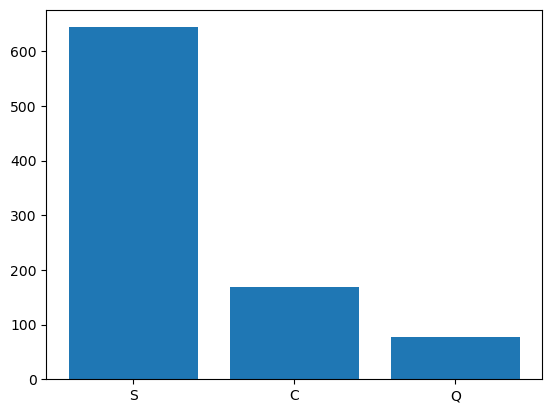

In [37]:
uni_plot(variable_names[11], df_train)

In [38]:
variable_names

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [39]:
len(df_train[variable_names[10]].unique()) 

148

In [40]:
length_train = len(df_train)
df = pd.concat([df_train, df_test], axis=0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
# chech missing data
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [42]:
# replace missing data in age by median
df['Age'] = df['Age'].fillna(df['Age'].median())

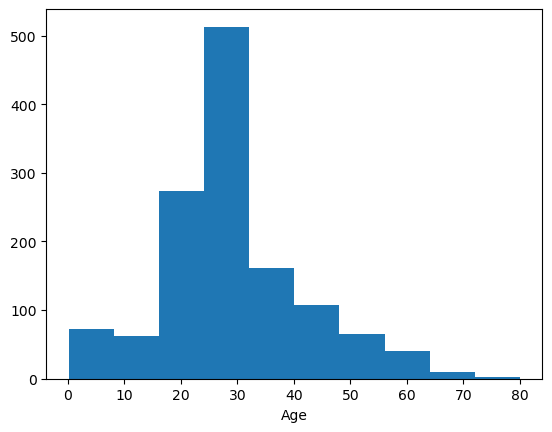

In [43]:
uni_plot('Age',df)

In [44]:
# binary variable 'sex' into numeric
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0.0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,True
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,1.0,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,False
4,5,0.0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,True


In [45]:
# spliting again into train and test data
df_train_new = df.iloc[:length_train].copy()
df_test_new = df.iloc[length_train:].copy()


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline

remove_columns = ['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin','Embarked']
target = df_train_new['Survived']
passengerId = df_test_new['PassengerId']
df_train_renew = df_train_new.drop(columns=remove_columns)
df_test_renew = df_test_new.drop(columns=remove_columns)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(df_train_renew, target, test_size=0.2, random_state=42)

models = {
    'logistic': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(),
    'RandomForest': RandomForestClassifier(),
    'xgb': XGBClassifier(random_state=42)
}

result = {}

for name, model in models.items():
    if name=='xgb':
        model.fit(X_train, y_train)
        train_score = model.score(X_train, y_train)
        test_score = model.score(X_test, y_test)
    else:
        model_pipe = make_pipeline(StandardScaler(), model)
        model_pipe.fit(X_train, y_train)
        train_score = model_pipe.score(X_train, y_train)
        test_score = model_pipe.score(X_test, y_test)
    result[name] = {'train': train_score, 'test': test_score}

result = pd.DataFrame(result)
result


,logistic,KNN,SVC,RandomForest,xgb
train,0.803371,0.867978,0.839888,0.978933,0.960674
test,0.798883,0.787709,0.810056,0.804469,0.804469


In [64]:
from sklearn.model_selection import GridSearchCV

xgb_model = XGBClassifier(
    random_state = 42,
    n_jobs = -1
)

grid_params = {
     "n_estimators": range(10,200,20),
    "max_depth": [3, 4, 5, 6],
    "learning_rate": [0.05, 0.1],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0],
}

grid = GridSearchCV(
    estimator = xgb_model,
    param_grid = grid_params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid.fit(X_train, y_train)
print('best params:', grid.best_params_)
print('best score:', grid.best_score_)

best params: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 90, 'subsample': 0.8}
best score: 0.8426967398798386


In [74]:
prediction = grid.predict(df_test_renew)
submition = pd.DataFrame({'PassengerId': passengerId, 'Survived':prediction})
submition.to_csv('submit_folder/submition1.csv', index=False)

In [66]:
prediction

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1])